In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_json("data.json")
df

,key,class,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,43284,observation,1577837700,43284,Mangalore Intl,1577826000,N,76.0,29,2900,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43284,observation,1577848500,43284,Mangalore Intl,1577836800,N,75.0,29,2900,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43284,observation,1577859300,43284,Mangalore Intl,1577847600,D,78.0,30,3000,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43284,observation,1577870100,43284,Mangalore Intl,1577858400,D,87.0,34,3400,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43284,observation,1577880900,43284,Mangalore Intl,1577869200,D,89.0,30,3000,...,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,43284,observation,1669626900,43284,Mangalore Intl,1669615200,D,82.0,28,2800,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7303,43284,observation,1669637700,43284,Mangalore Intl,1669626000,D,81.0,28,2800,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7304,43284,observation,1669648500,43284,Mangalore Intl,1669636800,D,81.0,28,2800,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7305,43284,observation,1669659300,43284,Mangalore Intl,1669647600,N,78.0,29,2900,...,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df=df.iloc[5000::, ::]

In [97]:
df.nunique()

key                             1
class                           1
expire_time_gmt              2307
obs_id                          1
obs_name                        1
valid_time_gmt               2307
day_ind                         2
temp                           29
wx_icon                        14
icon_extd                      17
wx_phrase                      13
pressure_tend                   0
pressure_desc                   0
dewPt                          32
heat_index                     41
rh                             72
pressure                       38
vis                             7
wc                             29
wdir                           16
wdir_cardinal                  18
gust                            0
wspd                           17
max_temp                       25
min_temp                       16
precip_total                   95
precip_hrly                     0
snow_hrly                       0
uv_desc                         5
feels_like    

In [98]:
df=df[['temp', 'pressure', 'rh', 'precip_total', 'day_ind', 'wx_phrase']]
df

,temp,pressure,rh,precip_total,day_ind,wx_phrase
5000,72.0,29.59,76.0,0.0,D,Fair
5001,86.0,29.58,41.0,NaN,D,Fair
5002,88.0,29.49,44.0,NaN,D,Fair
5003,85.0,29.49,48.0,NaN,D,Fair
5004,79.0,29.54,63.0,NaN,N,Fair
...,...,...,...,...,...,...
7302,82.0,29.51,78.0,NaN,D,Mostly Cloudy
7303,81.0,29.44,75.0,NaN,D,Mostly Cloudy
7304,81.0,29.44,75.0,NaN,D,Mostly Cloudy
7305,78.0,29.49,85.0,NaN,N,Partly Cloudy


In [99]:
df=df.rename(columns={'temp': 'temperature', 'rh': 'humidity', 'precip_total': 'rain', 'day_ind': 'day_or_night', 'wx_phrase': 'weather'})
df

,temperature,pressure,humidity,rain,day_or_night,weather
5000,72.0,29.59,76.0,0.0,D,Fair
5001,86.0,29.58,41.0,NaN,D,Fair
5002,88.0,29.49,44.0,NaN,D,Fair
5003,85.0,29.49,48.0,NaN,D,Fair
5004,79.0,29.54,63.0,NaN,N,Fair
...,...,...,...,...,...,...
7302,82.0,29.51,78.0,NaN,D,Mostly Cloudy
7303,81.0,29.44,75.0,NaN,D,Mostly Cloudy
7304,81.0,29.44,75.0,NaN,D,Mostly Cloudy
7305,78.0,29.49,85.0,NaN,N,Partly Cloudy


In [100]:
df['rain']=df['rain'].fillna(0)
df

,temperature,pressure,humidity,rain,day_or_night,weather
5000,72.0,29.59,76.0,0.0,D,Fair
5001,86.0,29.58,41.0,0.0,D,Fair
5002,88.0,29.49,44.0,0.0,D,Fair
5003,85.0,29.49,48.0,0.0,D,Fair
5004,79.0,29.54,63.0,0.0,N,Fair
...,...,...,...,...,...,...
7302,82.0,29.51,78.0,0.0,D,Mostly Cloudy
7303,81.0,29.44,75.0,0.0,D,Mostly Cloudy
7304,81.0,29.44,75.0,0.0,D,Mostly Cloudy
7305,78.0,29.49,85.0,0.0,N,Partly Cloudy


In [101]:
df.loc[df.isnull().sum(axis=1)!=0, ::]

,temperature,pressure,humidity,rain,day_or_night,weather


In [102]:
df=df.dropna()
df

,temperature,pressure,humidity,rain,day_or_night,weather
5000,72.0,29.59,76.0,0.0,D,Fair
5001,86.0,29.58,41.0,0.0,D,Fair
5002,88.0,29.49,44.0,0.0,D,Fair
5003,85.0,29.49,48.0,0.0,D,Fair
5004,79.0,29.54,63.0,0.0,N,Fair
...,...,...,...,...,...,...
7302,82.0,29.51,78.0,0.0,D,Mostly Cloudy
7303,81.0,29.44,75.0,0.0,D,Mostly Cloudy
7304,81.0,29.44,75.0,0.0,D,Mostly Cloudy
7305,78.0,29.49,85.0,0.0,N,Partly Cloudy


In [103]:
df.isnull().sum(axis=0)

temperature     0
pressure        0
humidity        0
rain            0
day_or_night    0
weather         0
dtype: int64

In [104]:
df['weather'].value_counts()

Mostly Cloudy          664
Fair                   598
Partly Cloudy          361
Cloudy                 341
Thunder                120
Light Rain              98
Light Rain Shower       62
Fog                     33
Rain Shower             13
Light Drizzle            9
Heavy Rain Shower        5
Rain Shower / Windy      2
Rain                     1
Name: weather, dtype: int64

In [105]:
df.loc[df['weather']=='Heavy Rain Shower', ['weather']]='Rain'
df.loc[df['weather']=='Rain Shower / Windy', ['weather']]='Rain Shower'
df.loc[df['weather']=='Fair / Windy', ['weather']]='Fair'
df.loc[df['weather']=='Light Rain / Windy', ['weather']]='Light Rain'

In [106]:
df['weather'].value_counts()

Mostly Cloudy        664
Fair                 598
Partly Cloudy        361
Cloudy               341
Thunder              120
Light Rain            98
Light Rain Shower     62
Fog                   33
Rain Shower           15
Light Drizzle          9
Rain                   6
Name: weather, dtype: int64

In [107]:
df.loc[df['weather']=='Mostly Cloudy', ['weather']] = 1
df.loc[df['weather']=='Fair', ['weather']] = 2
df.loc[df['weather']=='Partly Cloudy', ['weather']] = 3
df.loc[df['weather']=='Cloudy', ['weather']] = 4
df.loc[df['weather']=='Thunder', ['weather']] = 5
df.loc[df['weather']=='Light Rain', ['weather']] = 6
df.loc[df['weather']=='Light Rain Shower', ['weather']] = 7
df.loc[df['weather']=='Fog', ['weather']] = 8
df.loc[df['weather']=='Rain Shower', ['weather']] = 9
df.loc[df['weather']=='Light Drizzle', ['weather']] = 10
df.loc[df['weather']=='Rain', ['weather']] = 11


In [108]:
df['weather'].value_counts()

1     664
2     598
3     361
4     341
5     120
6      98
7      62
8      33
9      15
10      9
11      6
Name: weather, dtype: int64

In [109]:
df.loc[df['day_or_night']=='N', ['day_or_night']] = 0
df.loc[df['day_or_night']=='D', ['day_or_night']] = 1


In [110]:
df['day_or_night'].value_counts()

1    1160
0    1147
Name: day_or_night, dtype: int64

In [111]:
df.dtypes

temperature     float64
pressure        float64
humidity        float64
rain            float64
day_or_night     object
weather          object
dtype: object

In [112]:
df=df.convert_dtypes()
df.dtypes

temperature       Int64
pressure        Float64
humidity          Int64
rain            Float64
day_or_night      Int64
weather           Int64
dtype: object

In [113]:
from sklearn.utils import resample
d1=df[df['weather']==1]
d2=df[df['weather']==2]
d3=df[df['weather']==3]
d4=df[df['weather']==4]
d5=df[df['weather']==5]
d6=df[df['weather']==6]
d7=df[df['weather']==7]
d8=df[df['weather']==8]
d9=df[df['weather']==9]
d10=df[df['weather']==10]
d11=df[df['weather']==11]

d1 = resample(d1, n_samples=500)
d2 = resample(d2, n_samples=500)
d3 = resample(d3, n_samples=500)
d4 = resample(d4, n_samples=500)
d5 = resample(d5, n_samples=500)
d6 = resample(d6, n_samples=500)
d7 = resample(d7, n_samples=500)
d8 = resample(d8, n_samples=500)
d9 = resample(d9, n_samples=500)
d10 = resample(d10, n_samples=500)
d11 = resample(d11, n_samples=500)

df=pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11])
df

,temperature,pressure,humidity,rain,day_or_night,weather
6220,78,29.35,89,0.0,1,1
5569,78,29.43,87,0.0,0,1
5877,86,29.34,77,0.0,1,1
6018,81,29.38,81,0.05,1,1
6331,82,29.34,78,0.0,1,1
...,...,...,...,...,...,...
6222,77,29.4,91,0.0,0,11
6222,77,29.4,91,0.0,0,11
6281,75,29.4,91,3.3,1,11
6281,75,29.4,91,3.3,1,11


In [114]:
df

,temperature,pressure,humidity,rain,day_or_night,weather
6220,78,29.35,89,0.0,1,1
5569,78,29.43,87,0.0,0,1
5877,86,29.34,77,0.0,1,1
6018,81,29.38,81,0.05,1,1
6331,82,29.34,78,0.0,1,1
...,...,...,...,...,...,...
6222,77,29.4,91,0.0,0,11
6222,77,29.4,91,0.0,0,11
6281,75,29.4,91,3.3,1,11
6281,75,29.4,91,3.3,1,11


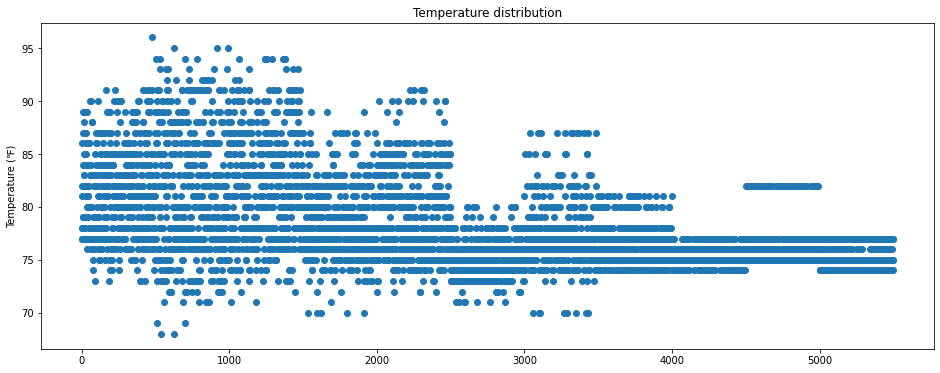

In [115]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['temperature'])
plt.ylabel("Temperature (℉)")
plt.title("Temperature distribution")
plt.show()

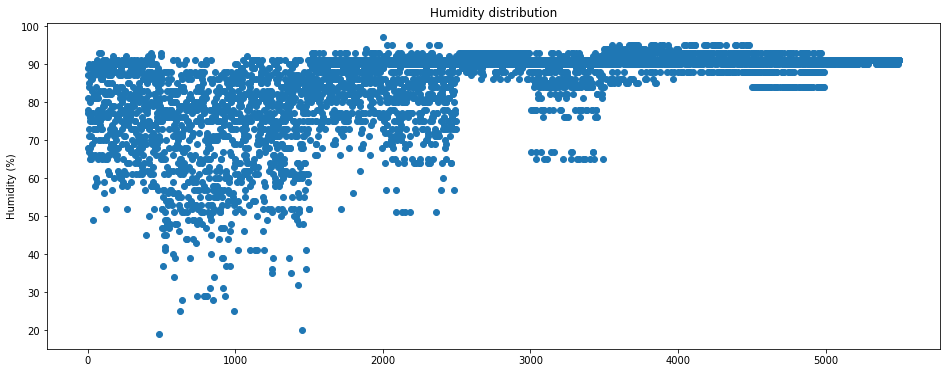

In [116]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['humidity'])
plt.ylabel("Humidity (%)")
plt.title("Humidity distribution")
plt.show()

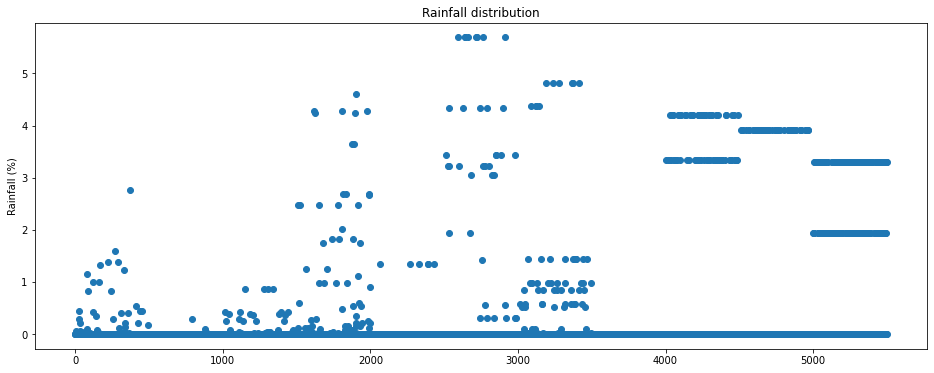

In [117]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['rain'])
plt.ylabel("Rainfall (%)")
plt.title("Rainfall distribution")
plt.show()

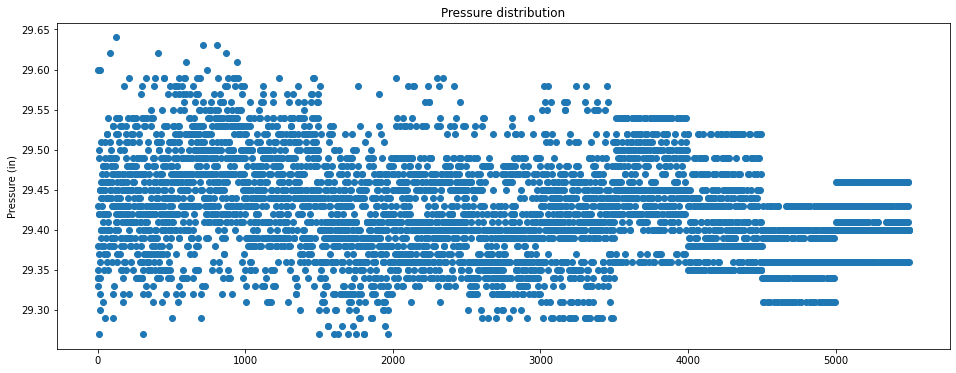

In [118]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['pressure'])
plt.ylabel("Pressure (in)")
plt.title("Pressure distribution")
plt.show()

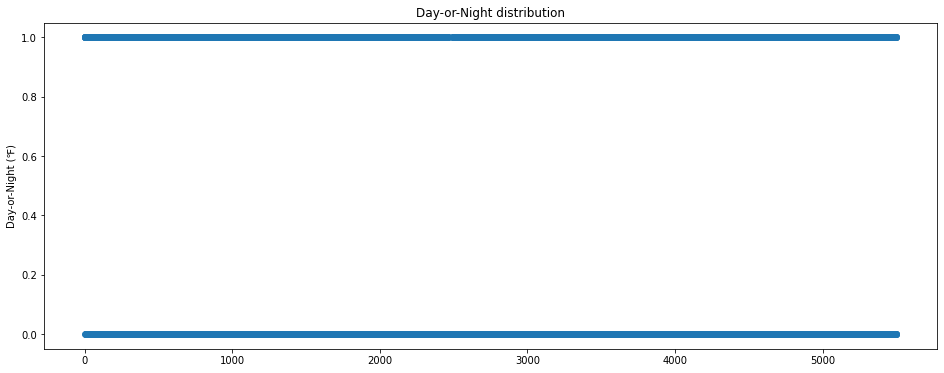

In [119]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['day_or_night'])
plt.ylabel("Day-or-Night (℉)")
plt.title("Day-or-Night distribution")
plt.show()

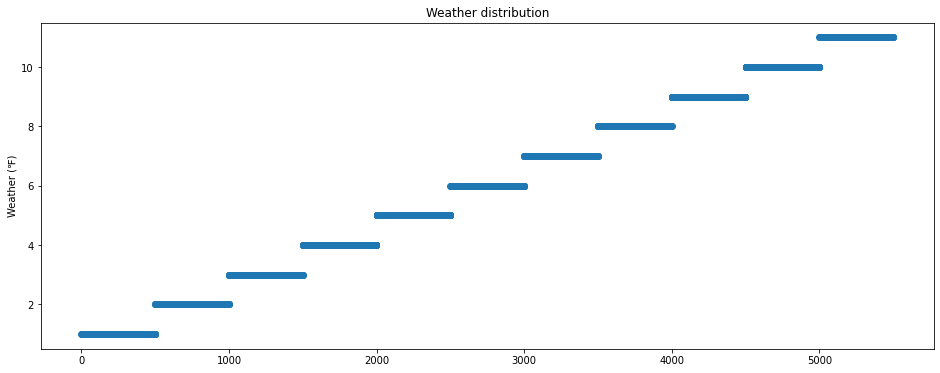

In [120]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['weather'])
plt.ylabel("Weather (℉)")
plt.title("Weather distribution")
plt.show()

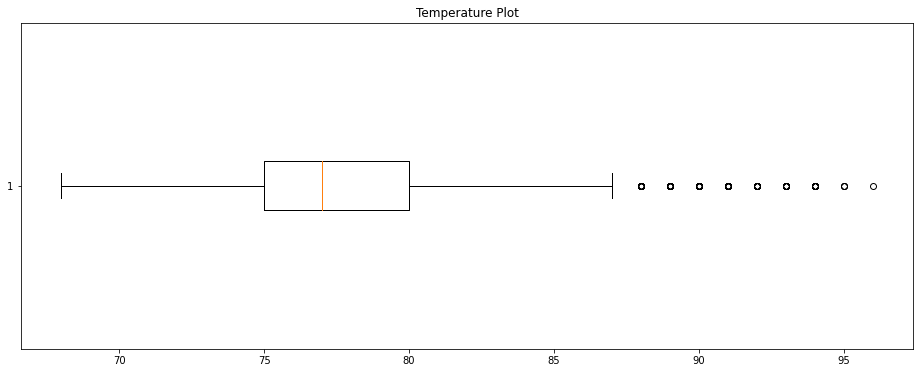

In [121]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['temperature'], vert=False, )
plt.title("Temperature Plot")
plt.show()

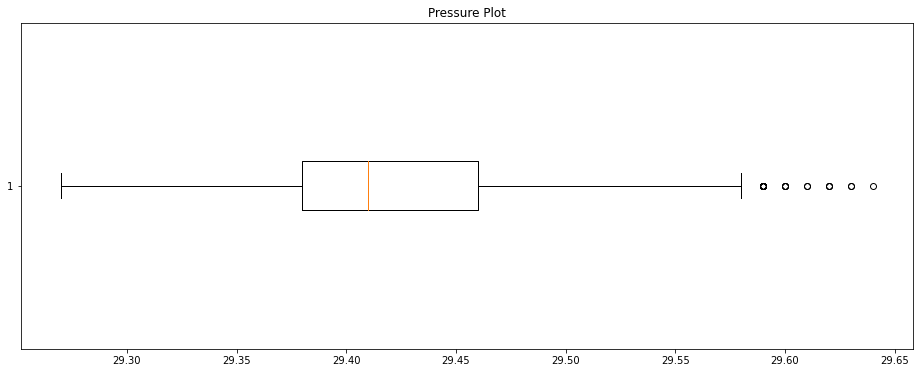

In [122]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['pressure'], vert=False, )
plt.title("Pressure Plot")
plt.show()

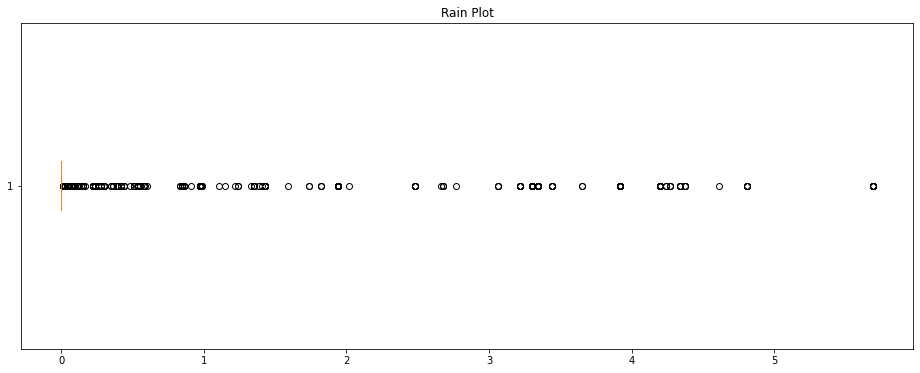

In [123]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['rain'], vert=False, )
plt.title("Rain Plot")
plt.show()

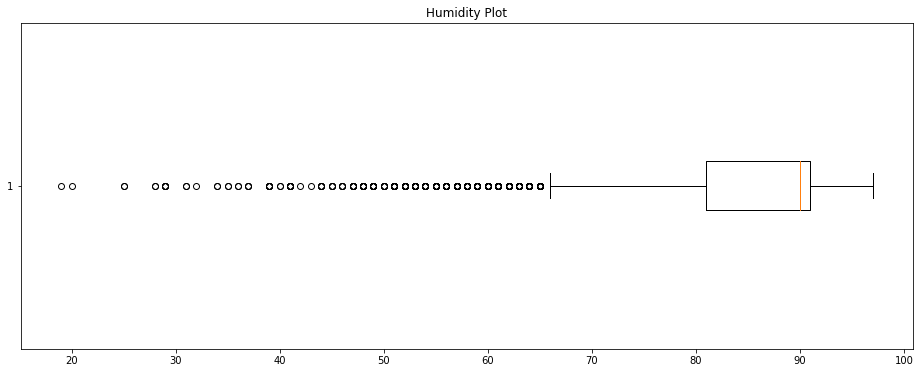

In [124]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['humidity'], vert=False, )
plt.title("Humidity Plot")
plt.show()

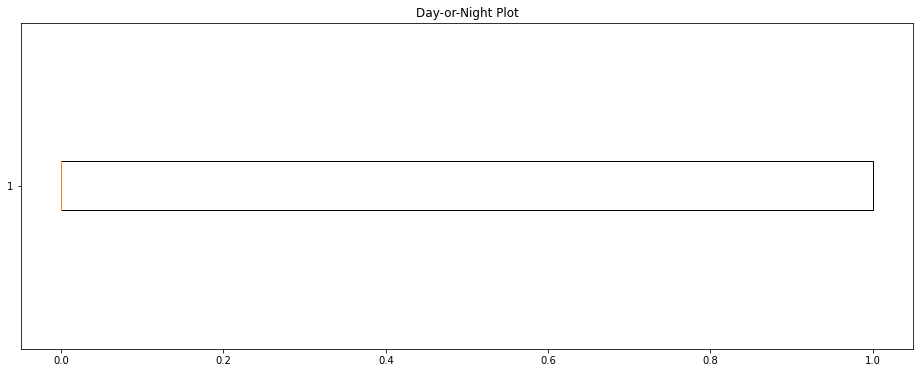

In [125]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['day_or_night'], vert=False, )
plt.title("Day-or-Night Plot")
plt.show()

In [126]:
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]

df = remove_outliers_zscore(df, 'temperature')
df = remove_outliers_zscore(df, 'pressure')
df = remove_outliers_zscore(df, 'rain')
df = remove_outliers_zscore(df, 'humidity')


In [127]:
df

,temperature,pressure,humidity,rain,day_or_night,weather
6220,78,29.35,89,0.0,1,1
5569,78,29.43,87,0.0,0,1
5877,86,29.34,77,0.0,1,1
6018,81,29.38,81,0.05,1,1
6331,82,29.34,78,0.0,1,1
...,...,...,...,...,...,...
6282,76,29.41,90,0.0,1,11
5914,74,29.43,91,1.94,1,11
6222,77,29.4,91,0.0,0,11
6222,77,29.4,91,0.0,0,11


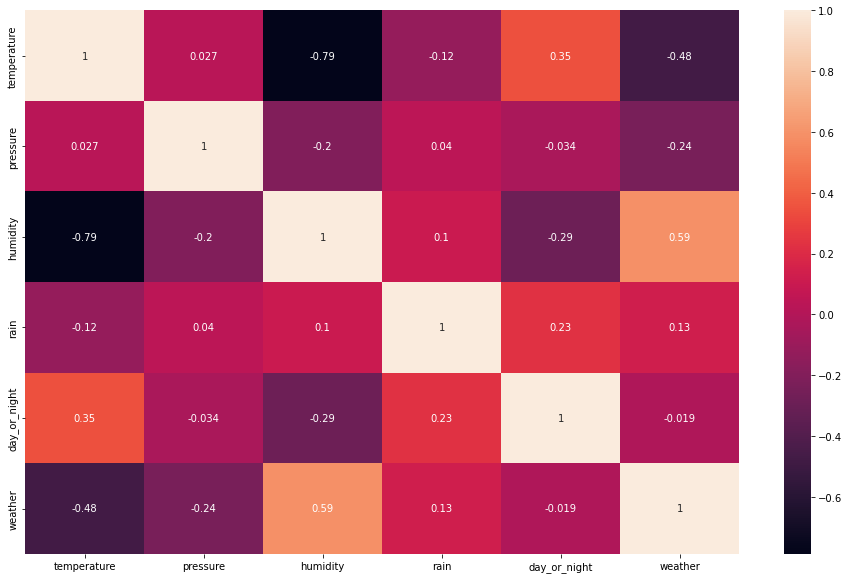

In [128]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [129]:
df = df.sample(frac = 1)

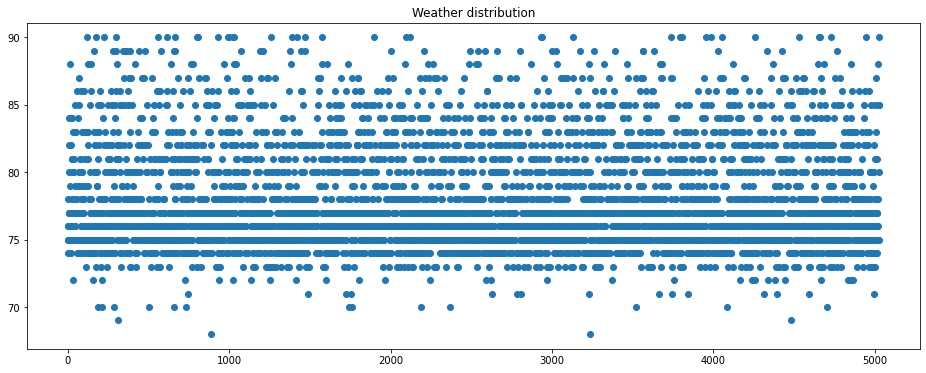

In [130]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['temperature'])
plt.title("Weather distribution")
plt.show()

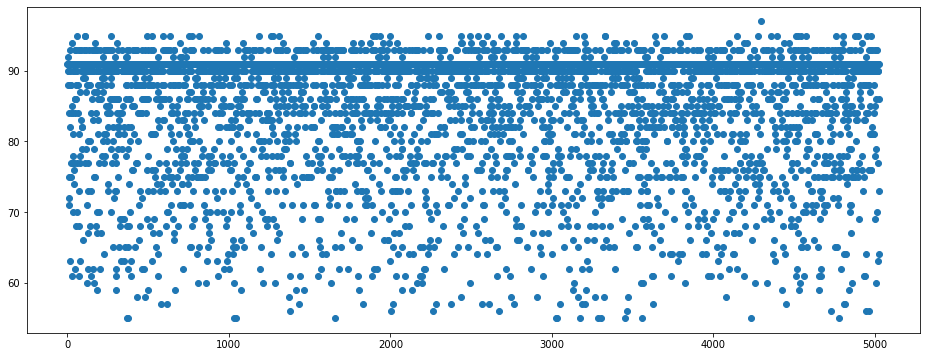

In [131]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['humidity'])
plt.show()

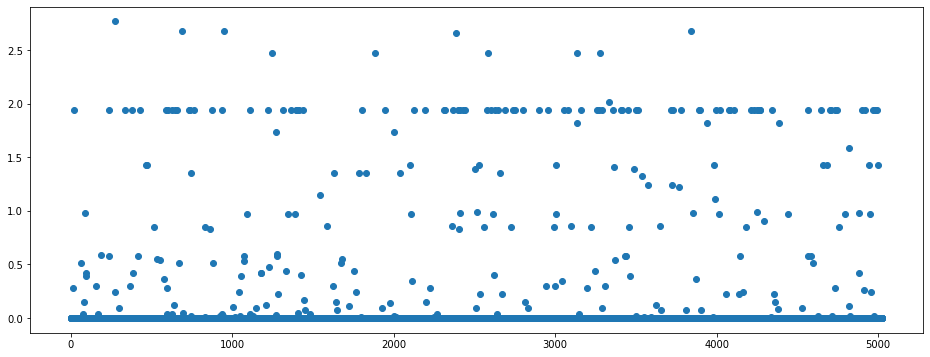

In [132]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['rain'])
plt.show()

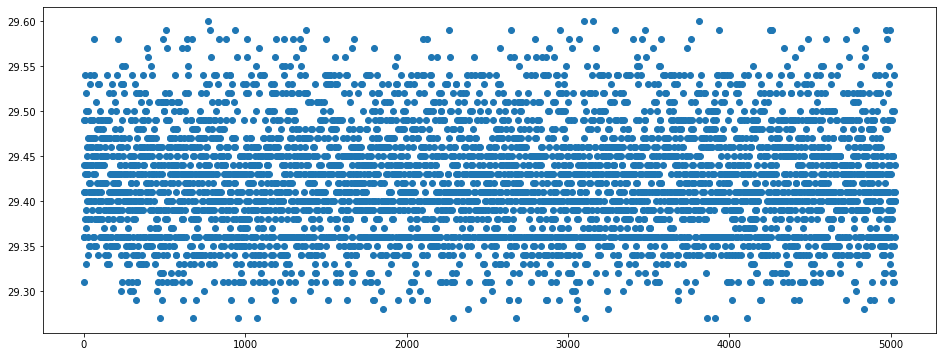

In [133]:
plt.figure(figsize=(16, 6))
plt.scatter(np.arange(0, len(df)), df['pressure'])
plt.show()

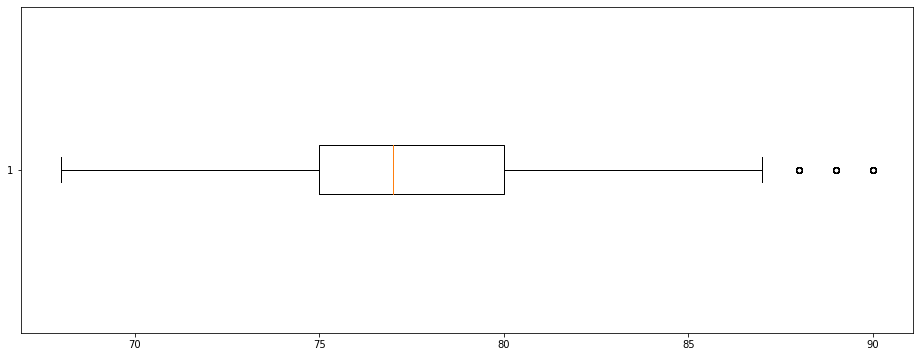

In [134]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['temperature'], vert=False, )
plt.show()

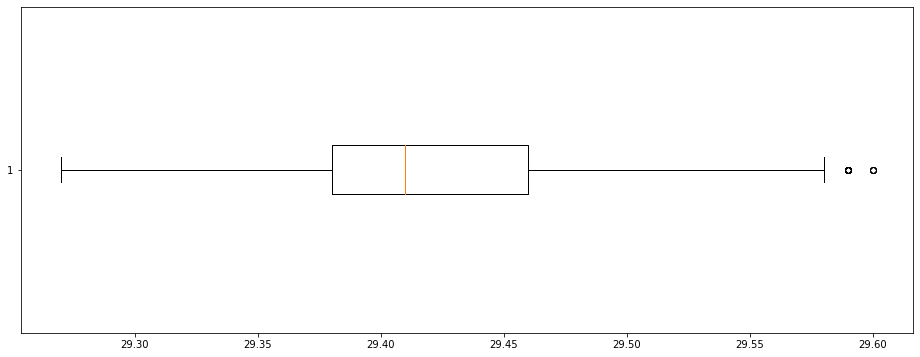

In [135]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['pressure'], vert=False, )
plt.show()

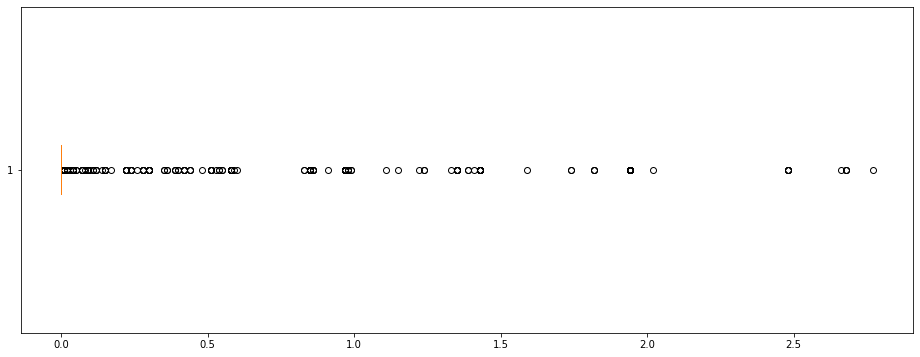

In [136]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['rain'], vert=False, )
plt.show()

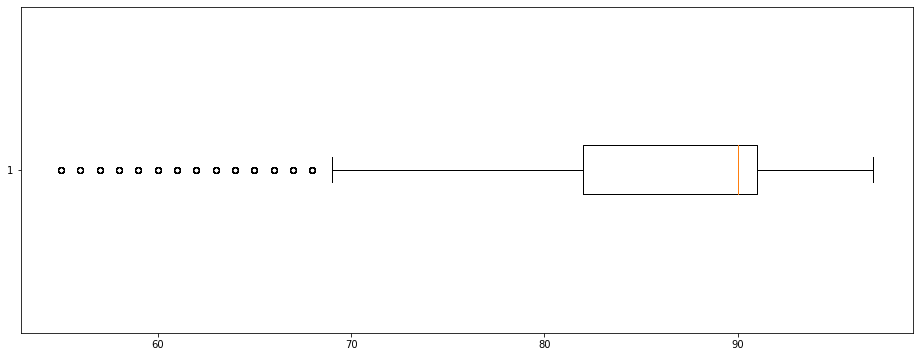

In [137]:
plt.figure(figsize=(16, 6))
plt.boxplot(df['humidity'], vert=False, )
plt.show()

In [138]:
df.to_csv("final_data.csv", index=False)

In [139]:
df=pd.read_csv("final_data.csv")
df

,temperature,pressure,humidity,rain,day_or_night,weather
0,75,29.36,91,0.0,0,10
1,76,29.41,90,0.0,1,11
2,76,29.49,91,0.0,0,8
3,78,29.44,92,0.0,1,7
4,74,29.36,91,0.0,1,6
...,...,...,...,...,...,...
5022,85,29.41,77,0.0,1,5
5023,80,29.40,86,0.0,1,4
5024,90,29.36,64,0.0,1,3
5025,75,29.44,91,0.0,0,4


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
x=df.drop(columns=['weather'])
y=df['weather']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [166]:
x_train

,temperature,pressure,humidity,rain,day_or_night
4239,77,29.40,85,0.00,1
537,78,29.45,90,0.00,0
4974,80,29.58,76,0.00,0
691,77,29.40,91,0.00,0
1068,85,29.40,70,0.00,1
...,...,...,...,...,...
4080,76,29.40,91,0.00,0
1555,79,29.56,80,0.00,0
2411,73,29.42,79,0.00,0
4013,76,29.34,91,0.97,1


In [167]:
x_train.dtypes

temperature       int64
pressure        float64
humidity          int64
rain            float64
day_or_night      int64
dtype: object

In [168]:
y_train

4239     7
537      7
4974     2
691     11
1068     1
        ..
4080     8
1555     2
2411     2
4013     7
2746     2
Name: weather, Length: 4021, dtype: int64

In [169]:
x_test

,temperature,pressure,humidity,rain,day_or_night
1986,82,29.34,84,0.0,1
3635,78,29.54,90,0.0,1
4834,74,29.28,91,0.0,0
1377,76,29.47,91,0.0,0
1462,77,29.43,90,0.0,0
...,...,...,...,...,...
4089,75,29.40,91,0.0,0
1347,74,29.32,91,0.0,1
4542,74,29.38,93,0.0,0
2018,79,29.41,86,0.0,0


In [170]:
y_test

1986    10
3635     8
4834     4
1377     6
1462     4
        ..
4089     9
1347     6
4542     6
2018     5
2498     7
Name: weather, Length: 1006, dtype: int64

In [172]:
from sklearn.neighbors import KNeighborsClassifier        #K-Nearest Neighbors (KNN)
from sklearn.tree import DecisionTreeClassifier        #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier        #Random Forest Classifier

## K-Nearest Neighbors (KNN)

In [173]:
model=KNeighborsClassifier()
model.fit(x_train, y_train)
prediction=model.predict(x_test)
score=accuracy_score(y_test, prediction)
score

0.6978131212723658

## Decision Tree Classifier

In [174]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)
prediction=model.predict(x_test)
score=accuracy_score(y_test, prediction)
score

0.8141153081510935

## Random Forest Classifier

In [224]:
model=RandomForestClassifier()
model.fit(x_train, y_train)
prediction=model.predict(x_test)
score=accuracy_score(y_test, prediction)
score

0.8170974155069582

In [225]:
from joblib import dump

In [226]:
dump(model, "model.joblib")

['model.joblib']

###### 

In [4]:
from joblib import load

model = load('model.joblib')
# [temperature	pressure	humidity	rain	day_or_night]
prediction = model.predict([[82, 9.34, 84, 0.0, 1]])
print(prediction)

[10]


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "The feature names should match those that were passed during fit.\n"


In [ ]:
pre